In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')


In [147]:
# Loading the Cleaned High Value Customers (HVC) telecom dataset
HVC_telecom = pd.read_csv("G:/Data-Analytics-Projects-master/telecom-churn-prediction-main/telecom-churn-prediction-main/Data/Enhanced Dataset for HVC Telecom.csv")
HVC_telecom.head()

,Unnamed: 0,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Dividing the dataset into features (X) and target (y)
X = HVC_telecom.drop('Churn', axis=1)
y = HVC_telecom['Churn']

In [148]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [149]:
# Applying feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
print("Type of X_train_scaled:", type(X_train_scaled))
print("Type of X_test_scaled:", type(X_test_scaled))

Type of X_train_scaled: <class 'numpy.ndarray'>
Type of X_test_scaled: <class 'numpy.ndarray'>


In [151]:
# Converting scaled training data to dataframes and providing summary statistics
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_train_summary = X_train_scaled_df.describe()

In [152]:
# Converting scaled test data to dataframes
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


In [153]:
# Increasing the max_iter parameter for logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Adjust max_iter as needed


In [154]:
# Fitting the logistic regression model
logreg.fit(X_train_scaled_df, y_train)

LogisticRegression(max_iter=1000)

In [155]:
# Applying Recursive Feature Elimination (RFE) with the adjusted logistic regression model
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_scaled_df, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)

In [156]:
# Extracting RFE results and selected features
rfe_results = list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))
selected_features = X_train_scaled_df.columns[rfe.support_]

In [157]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Unnamed: 0', False, 78),
 ('arpu_8', False, 12),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 50),
 ('roam_ic_mou_8', False, 69),
 ('roam_og_mou_8', False, 55),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_8', False, 34),
 ('loc_og_t2f_mou_8', False, 15),
 ('loc_og_t2c_mou_8', False, 42),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 54),
 ('std_og_t2f_mou_8', False, 8),
 ('std_og_mou_8', False, 38),
 ('isd_og_mou_8', False, 72),
 ('spl_og_mou_8', False, 39),
 ('og_others_8', False, 49),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 6),
 ('std_ic_t2m_mou_8', False, 80),
 ('std_ic_t2f_mou_8', False, 2),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', False, 22),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 66),
 ('ic_others_8', False, 68),
 ('total_rech_num_8', False, 3),
 ('total_rech_

In [158]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8',
       'fb_user_8', 'sep_vbc_3g', 'av_arpu_good', 'av_loc_ic_mou_good'],
      dtype='object')

In [159]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20701
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3888.2
Date:                Sun, 27 Aug 2023   Deviance:                       7776.4
Time:                        09:10:01   Pearson chi2:                 8.61e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1974
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4199      0.048     -8.790      0.000      -0.514      -0.326
onnet_mou_8            0.0014      0.000      3.818      0.000       0.001       0.002
loc_og_mou_8          -0.0015      0.000     -3.471      0.001      -0.002      -0.001
std_og_t2t_mou_8      -0.0011      0.000     -2.495      0.013      -0.002      -0.000
total_og_mou_8        -0.0013      0.000     -7.435      0.000      -0.002      -0.001
loc_ic_t2t_mou_8     111.1304      6.150     18.069      0.000      99.076     123.185
loc_ic_t2m_mou_8     111.1284      6.150     18.069      0.000      99.074     123.183
loc_ic_t2f_mou_8     111.1327      6.151     18.069      0.000      99.078     123.188
loc_ic_mou_8        -111.1374      6.150    -18.071      0.000    -123.192     -99.083
std_ic_mou_8          -0.0022      0.001     -3.247      0.001      -0.003      -0.001
spl_ic_mou_8          -6.7874      1.116     -6.080      0.000      -8.975      -4.599
last_day_rch_amt_8    -0.0042      0.000    -11.795      0.000      -0.005      -0.003
fb_user_8             -1.4594      0.093    -15.732      0.000      -1.641      -1.278
sep_vbc_3g            -0.0122      0.004     -2.752      0.006      -0.021      -0.004
av_arpu_good           0.0011   7.88e-05     13.636      0.000       0.001       0.001
av_loc_ic_mou_good     0.0018      0.000      7.255      0.000       0.001       0.002
======================================================================================
"""

In [160]:
# Create a VIF dataframe
vif_data = {'Features': X_train[col].columns, 'VIF': [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]}
vif = pd.DataFrame(vif_data)
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by="VIF", ascending=False)

In [161]:
# Display the VIF dataframe
print(vif)

              Features           VIF
7         loc_ic_mou_8  2.156525e+09
5     loc_ic_t2m_mou_8  9.776530e+08
4     loc_ic_t2t_mou_8  4.418844e+08
6     loc_ic_t2f_mou_8  3.555021e+07
0          onnet_mou_8  1.063000e+01
2     std_og_t2t_mou_8  9.310000e+00
1         loc_og_mou_8  6.330000e+00
14  av_loc_ic_mou_good  5.590000e+00
3       total_og_mou_8  5.420000e+00
13        av_arpu_good  2.980000e+00
10  last_day_rch_amt_8  1.650000e+00
11           fb_user_8  1.450000e+00
8         std_ic_mou_8  1.140000e+00
9         spl_ic_mou_8  1.050000e+00
12          sep_vbc_3g  1.040000e+00


In [162]:
# Drop a specific feature to address multicollinearity
if 'av_total_og_mou_good' in col:
    col = col.drop('av_total_og_mou_good')

In [163]:
col

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8',
       'fb_user_8', 'sep_vbc_3g', 'av_arpu_good', 'av_loc_ic_mou_good'],
      dtype='object')

In [164]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20701
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3888.2
Date:                Sun, 27 Aug 2023   Deviance:                       7776.4
Time:                        09:10:03   Pearson chi2:                 8.61e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1974
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4199      0.048     -8.790      0.000      -0.514      -0.326
onnet_mou_8            0.0014      0.000      3.818      0.000       0.001       0.002
loc_og_mou_8          -0.0015      0.000     -3.471      0.001      -0.002      -0.001
std_og_t2t_mou_8      -0.0011      0.000     -2.495      0.013      -0.002      -0.000
total_og_mou_8        -0.0013      0.000     -7.435      0.000      -0.002      -0.001
loc_ic_t2t_mou_8     111.1304      6.150     18.069      0.000      99.076     123.185
loc_ic_t2m_mou_8     111.1284      6.150     18.069      0.000      99.074     123.183
loc_ic_t2f_mou_8     111.1327      6.151     18.069      0.000      99.078     123.188
loc_ic_mou_8        -111.1374      6.150    -18.071      0.000    -123.192     -99.083
std_ic_mou_8          -0.0022      0.001     -3.247      0.001      -0.003      -0.001
spl_ic_mou_8          -6.7874      1.116     -6.080      0.000      -8.975      -4.599
last_day_rch_amt_8    -0.0042      0.000    -11.795      0.000      -0.005      -0.003
fb_user_8             -1.4594      0.093    -15.732      0.000      -1.641      -1.278
sep_vbc_3g            -0.0122      0.004     -2.752      0.006      -0.021      -0.004
av_arpu_good           0.0011   7.88e-05     13.636      0.000       0.001       0.001
av_loc_ic_mou_good     0.0018      0.000      7.255      0.000       0.001       0.002
======================================================================================
"""

In [165]:
# Storing the predicted probabilities in a DataFrame
y_train_pred = pd.DataFrame({
    'Churn_actual': y_train.values,
    'Churn_Prob': res.predict(X_train_sm)
})

In [166]:
# Creating a new column 'predicted' based on probability threshold
threshold = 0.5
y_train_pred['predicted'] = y_train_pred['Churn_Prob'].apply(lambda x: 1 if x > threshold else 0)

In [167]:
# Displaying the first few rows of the DataFrame
print(y_train_pred.head())

       Churn_actual  Churn_Prob  predicted
13568             0    0.038667          0
28122             0    0.002651          0
1574              1    0.408813          0
13548             0    0.001905          0
8840              0    0.025825          0


In [168]:
# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_train_pred['Churn_actual'], y_train_pred['predicted'])
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9274508857460056


In [169]:
# Define a list of different probability cutoffs
cutoffs = [float(x) / 10 for x in range(10)]

# Create columns with different probability cutoffs
for cutoff in cutoffs:
    y_train_pred[cutoff] = y_train_pred['Churn_Prob'].apply(lambda x: 1 if x > cutoff else 0)

# Display the first few rows of the DataFrame
print(y_train_pred.head())

       Churn_actual  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
13568             0    0.038667          0    1    0    0    0    0    0    0   
28122             0    0.002651          0    1    0    0    0    0    0    0   
1574              1    0.408813          0    1    1    1    1    1    0    0   
13548             0    0.001905          0    1    0    0    0    0    0    0   
8840              0    0.025825          0    1    0    0    0    0    0    0   

       0.7  0.8  0.9  
13568    0    0    0  
28122    0    0    0  
1574     0    0    0  
13548    0    0    0  
8840     0    0    0  


In [170]:
# Create a DataFrame to store accuracy, sensitivity, and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm = confusion_matrix(y_train_pred['Churn_actual'], y_train_pred[i])
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.087899     1.000000     0.000000
0.1   0.1  0.836656     0.824272     0.837849
0.2   0.2  0.906357     0.739154     0.922470
0.3   0.3  0.926775     0.695222     0.949090
0.4   0.4  0.938746     0.656782     0.965919
0.5   0.5  0.927451     0.329489     0.985076
0.6   0.6  0.920017     0.142779     0.994920
0.7   0.7  0.915190     0.059857     0.997619
0.8   0.8  0.913260     0.023064     0.999047
0.9   0.9  0.912536     0.007139     0.999788


<Figure size 1000x600 with 0 Axes>

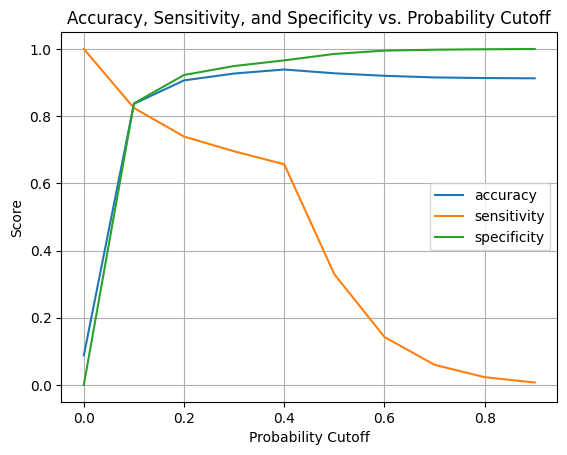

In [172]:
# Plot accuracy, sensitivity, and specificity for various probabilities
plt.figure(figsize=(10, 6))

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

In [173]:
# Calculate and print train accuracy score
train_accuracy = accuracy_score(y_train_pred['Churn_actual'], y_train_pred['predicted'])
print("Train Accuracy Score:", train_accuracy)

# Calculate and print train recall score
train_recall = recall_score(y_train_pred['Churn_actual'], y_train_pred['predicted'])
print("Train Recall Score:", train_recall)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_train_pred['Churn_actual'], y_train_pred['predicted'])
print("Confusion Matrix:\n", conf_matrix)

Train Accuracy Score: 0.9274508857460056
Train Recall Score: 0.32948929159802304
Confusion Matrix:
 [[18614   282]
 [ 1221   600]]


In [139]:
# Applying the previous model on the test set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

# Defining probabilities on a DataFrame based on the optimal cutoff
y_pred_df = pd.DataFrame({'y_test_prob': y_test_pred, 'y_test_actual': y_test})
optimal_cutoff = 0.15  # Adjust this to your optimal cutoff
y_pred_df['final_predicted'] = y_pred_df['y_test_prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Calculate and print test accuracy score
test_accuracy = accuracy_score(y_pred_df['y_test_actual'], y_pred_df['final_predicted'])
print("Test Accuracy Score:", test_accuracy)

# Calculate and print test recall score
test_recall = recall_score(y_pred_df['y_test_actual'], y_pred_df['final_predicted'])
print("Test Recall Score:", test_recall)

# Calculate and print confusion matrix
conf_matrix_test = confusion_matrix(y_pred_df['y_test_actual'], y_pred_df['final_predicted'])
print("Confusion Matrix (Test):\n", conf_matrix_test)

Test Accuracy Score: 0.8780268048203627
Test Recall Score: 0.7707253886010362
Confusion Matrix (Test):
 [[7201  906]
 [ 177  595]]


In [174]:
# Create the parameter grid
param_grid = {
    'max_depth': range(3, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           cv=n_folds, scoring='recall', verbose=1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the optimal recall score and hyperparameters
print("Best Recall Score: {0}".format(grid_search.best_score_))
print("Best DecisionTree Parameters: {0}".format(grid_search.best_estimator_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Recall Score: 0.8484329369260877
Best DecisionTree Parameters: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=100,
                       min_samples_split=100)


In [175]:
# model with optimal hyperparameters
dtree = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                              class_weight='balanced')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# Validating the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.8392837031197207:
Sensitivity/Recall 0.8601036269430051:


array([[6788, 1319],
       [ 108,  664]], dtype=int64)

In [176]:
# Create the parameter grid
param_grid = {
    'max_depth': range(3, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           cv=n_folds, scoring='recall', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the optimal recall score and hyperparameters
print("Best Recall Score: {0}".format(grid_search.best_score_))
print("Best DecisionTree Parameters: {0}".format(grid_search.best_estimator_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Recall Score: 0.8484329369260877
Best DecisionTree Parameters: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, min_samples_leaf=100,
                       min_samples_split=50)


In [177]:
# model with optimal hyperparameters and max_depth as 3
dtree = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                              class_weight='balanced')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# Validating the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.8702556594211059:
Sensitivity/Recall 0.7823834196891192:


array([[7123,  984],
       [ 168,  604]], dtype=int64)

In [178]:
HVC_telecom.head()

,Unnamed: 0,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


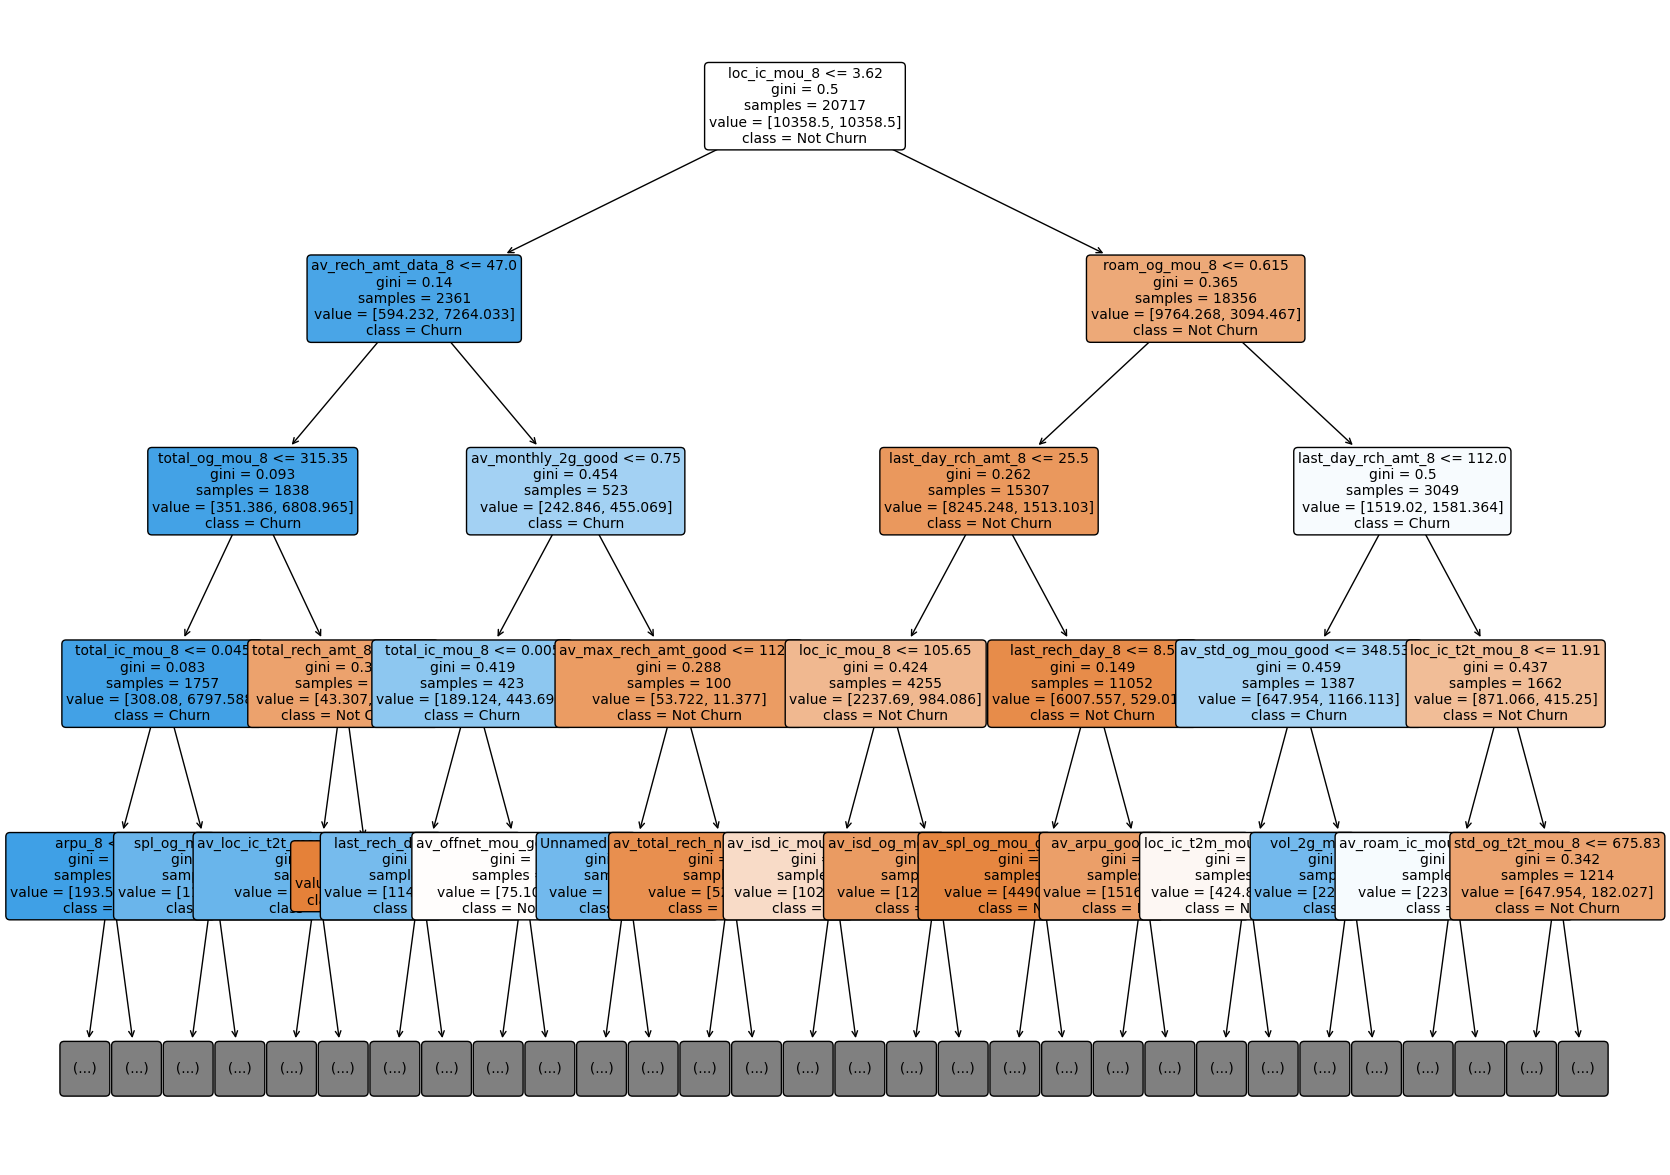

In [179]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a decision tree classifier
dtree = DecisionTreeClassifier(class_weight='balanced')

# Fit the classifier
dtree.fit(X_train, y_train)

# Visualize the decision tree with enhanced details
plt.figure(figsize=(20, 15))
plot_tree(dtree, 
          feature_names=X.columns, 
          class_names=["Not Churn", "Churn"], 
          filled=True, 
          rounded=True, 
          fontsize=10,  # Adjust font size for better readability
          max_depth=4)  # Limit depth for better visualization

plt.show()






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


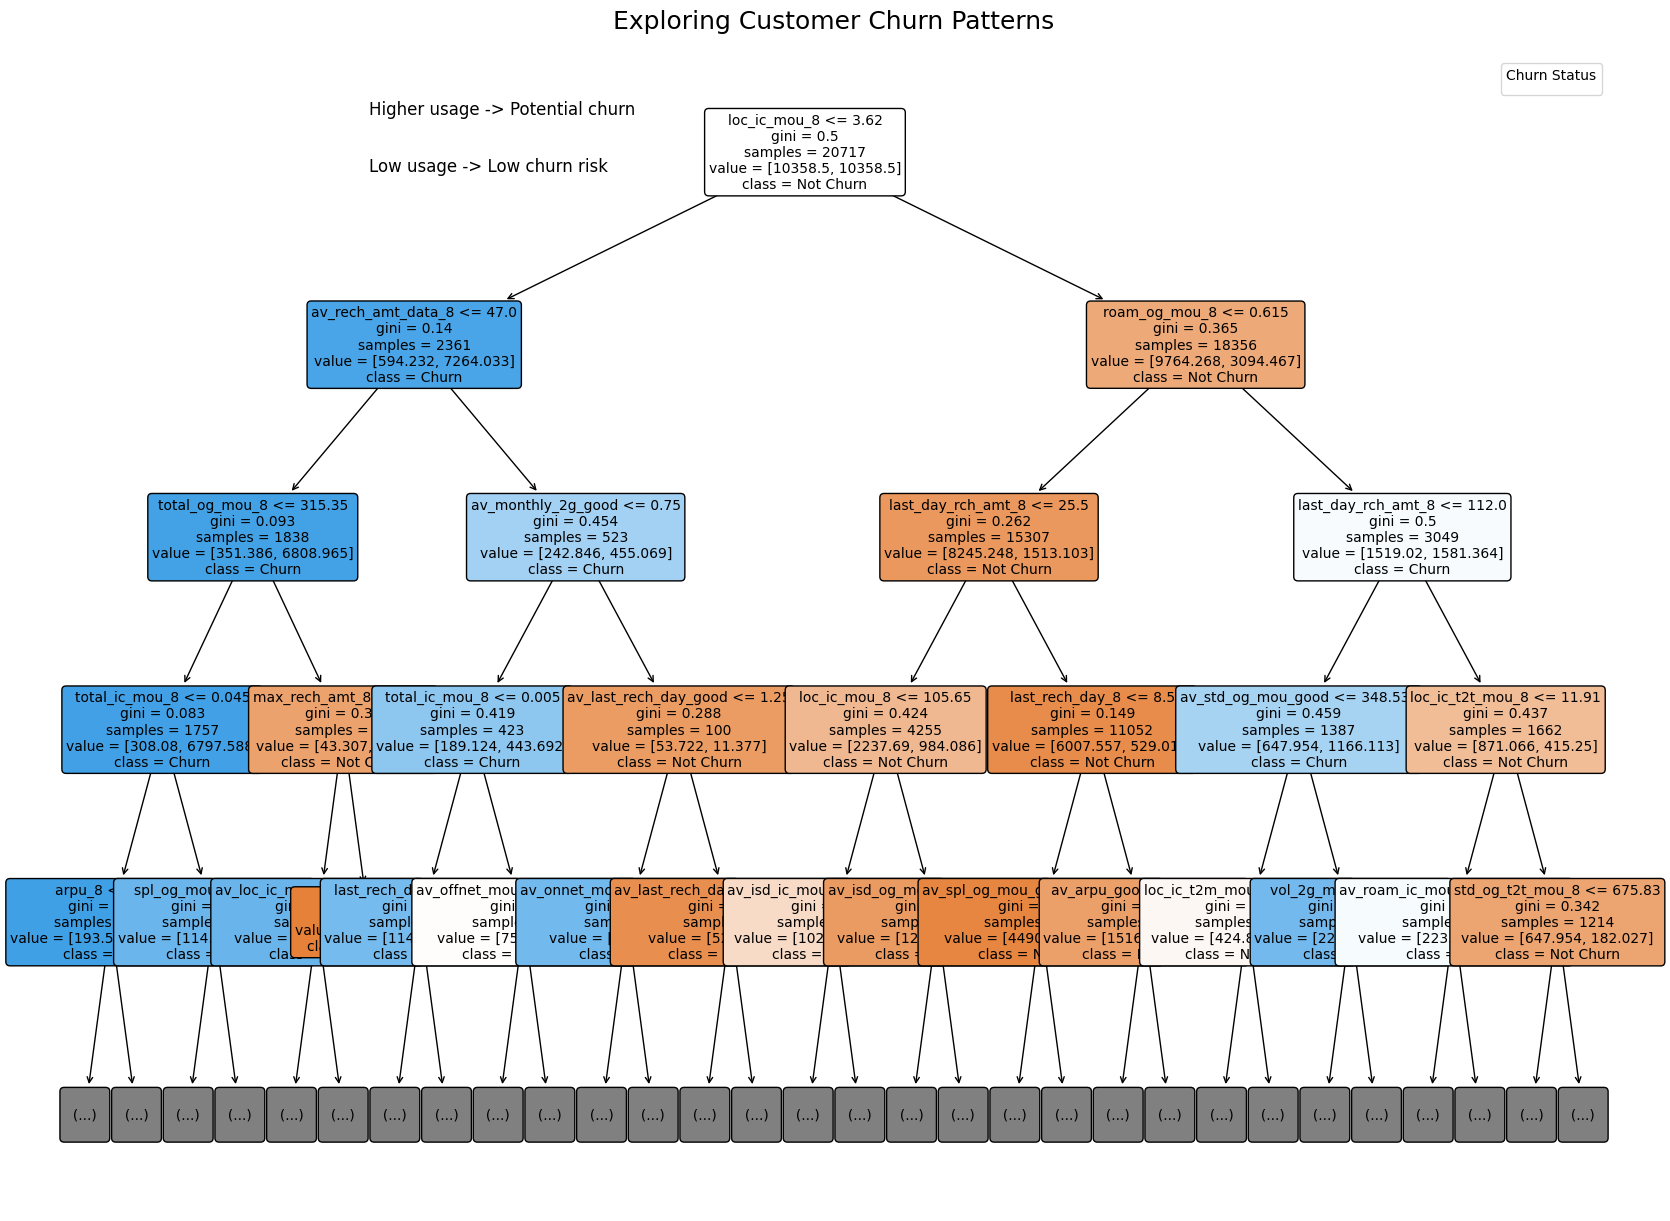

In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a decision tree classifier to understand customer churn behavior
churn_tree = DecisionTreeClassifier(class_weight='balanced')

# Train the classifier on customer data
churn_tree.fit(X_train, y_train)

# Visualize the decision tree to uncover key insights
plt.figure(figsize=(20, 15))
plot_tree(churn_tree, 
          feature_names=X.columns, 
          class_names=["Not Churn", "Churn"], 
          filled=True, 
          rounded=True, 
          fontsize=10,  # Adjust font size for better readability
          max_depth=4,  # Limit depth for clear understanding
          label="all")  # Label all nodes for context

# Enhance readability and storytelling in the visualization
plt.title("Exploring Customer Churn Patterns", fontsize=18, pad=20)
plt.xlabel("Feature Values", fontsize=14, labelpad=10)
plt.ylabel("Churn Status", fontsize=14, labelpad=10)
plt.legend(title="Churn Status", loc="upper right")

# Highlight insights: Decision nodes and their thresholds
plt.text(0.2, 0.95, "Higher usage -> Potential churn", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.2, 0.9, "Low usage -> Low churn risk", transform=plt.gca().transAxes, fontsize=12)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


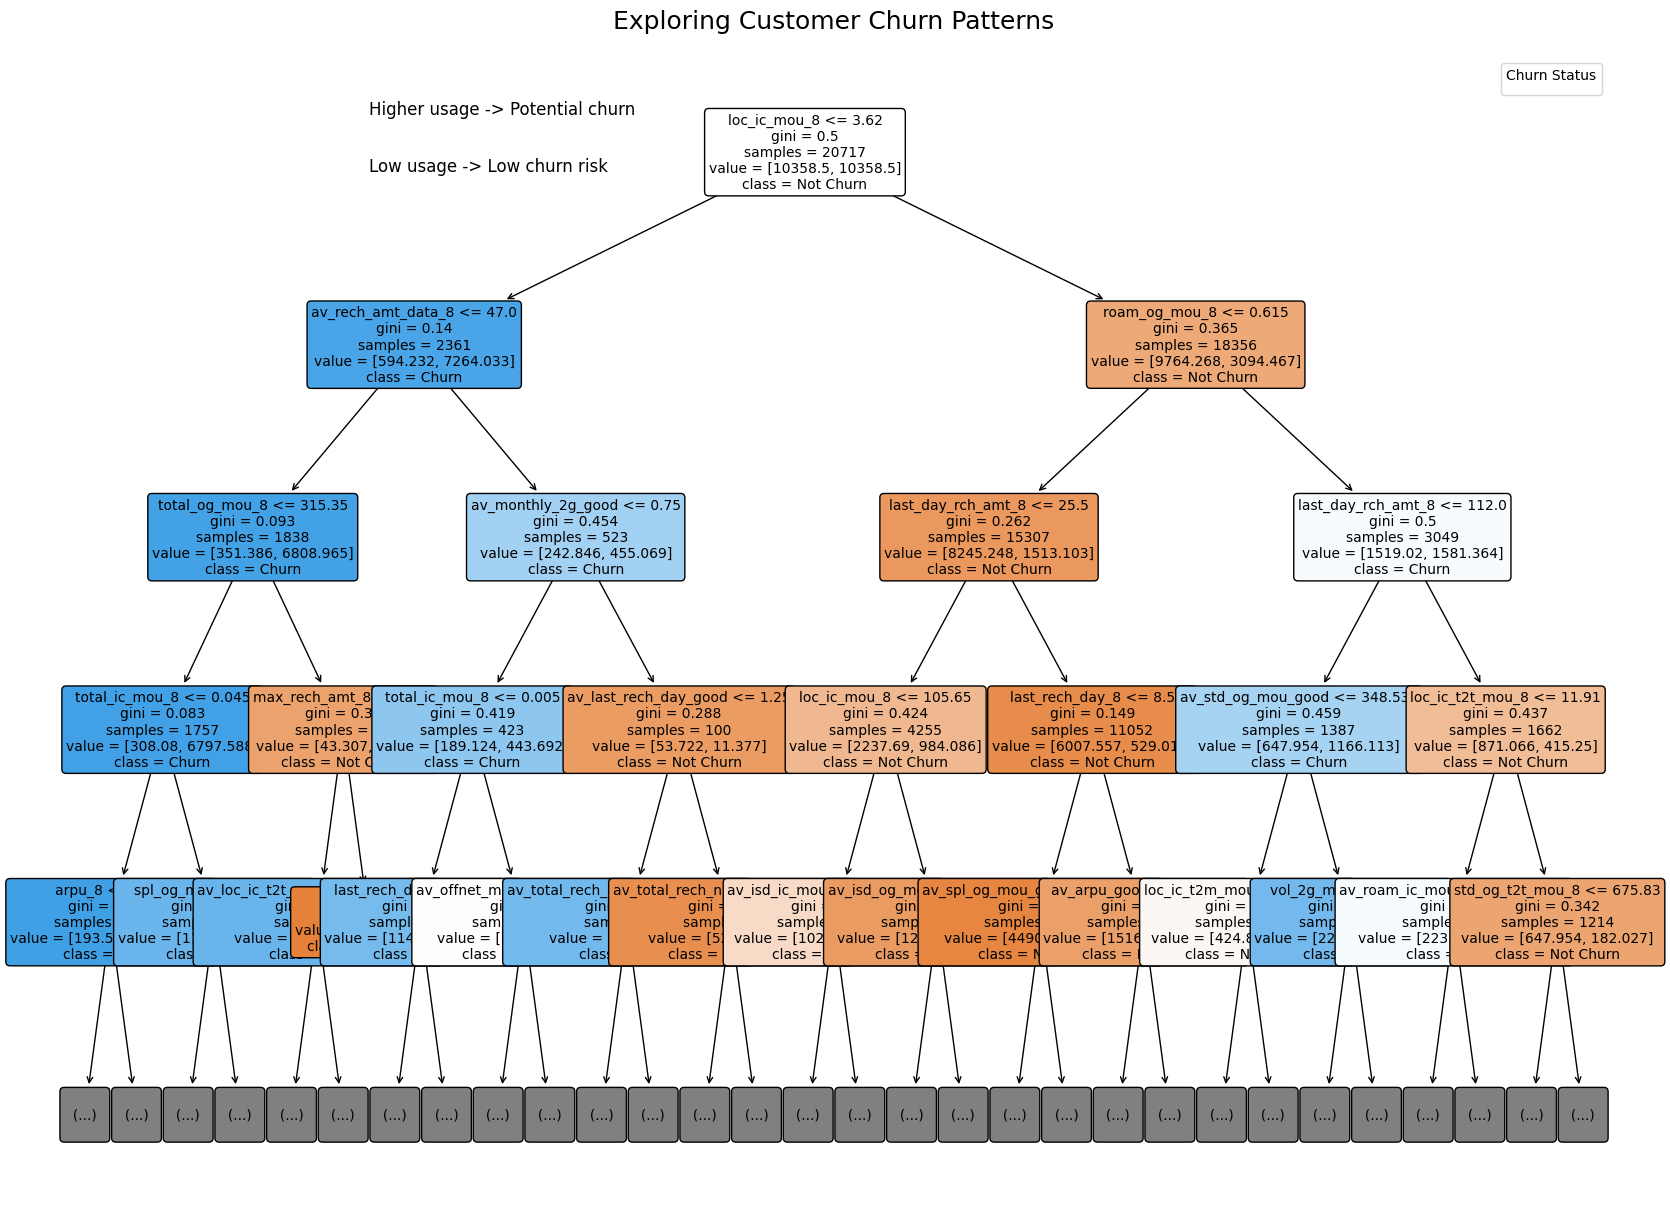

In [180]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a decision tree classifier to understand customer churn behavior
churn_tree = DecisionTreeClassifier(class_weight='balanced')

# Train the classifier on customer data
churn_tree.fit(X_train, y_train)

# Visualize the decision tree to uncover key insights
plt.figure(figsize=(20, 15))
plot_tree(churn_tree, 
          feature_names=X.columns, 
          class_names=["Not Churn", "Churn"], 
          filled=True, 
          rounded=True, 
          fontsize=10,  # Adjust font size for better readability
          max_depth=4,  # Limit depth for clear understanding
          label="all")  # Label all nodes for context

# Enhance readability and storytelling in the visualization
plt.title("Exploring Customer Churn Patterns", fontsize=18, pad=20)
plt.xlabel("Feature Values", fontsize=14, labelpad=10)
plt.ylabel("Churn Status", fontsize=14, labelpad=10)
plt.legend(title="Churn Status", loc="upper right")

# Highlight insights: Decision nodes and their thresholds
plt.text(0.2, 0.95, "Higher usage -> Potential churn", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.2, 0.9, "Low usage -> Low churn risk", transform=plt.gca().transAxes, fontsize=12)

plt.show()